In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
import pandas as pd
from sklearn.metrics import plot_roc_curve,auc

In [2]:
# Load the diabetes dataset
# this will return both the response and prediction as x and y
diabetes_x,diabetes_y_orig = datasets.load_diabetes(return_X_y=True,as_frame=True)

In [3]:
## look at the https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset to understand the variable names
diabetes_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
diabetes_y=pd.DataFrame(preprocessing.binarize(diabetes_y_orig.values.reshape(-1,1),threshold=200),columns=['target'])
diabetes_y.head(3)

,target
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [5]:
# Create one training and testing sample using bmi and bp as features
X_train1, X_test1, y_train1, y_test1 = train_test_split(diabetes_x.loc[:,['bmi','bp']], 
                                                        diabetes_y, 
                                                        test_size=0.20, 
                                                        random_state=42)
# Create one training and testing sample using s5 and s6 as features
X_train2, X_test2, y_train2, y_test2 = train_test_split(diabetes_x.loc[:,['age','sex']], 
                                                        diabetes_y, 
                                                        test_size=0.20, 
                                                        random_state=42)

In [6]:
# training of first model using LogisiticRegression with 5 fold crossvalidation  and lbfgs solver (default)
clf1 =  LogisticRegressionCV(random_state=0, solver='lbfgs',cv=5)
# fit the training data to the model # we are using np.ravel because LogisticRegression expects the input to be data in 1D
clf1.fit(X_train1,np.ravel(y_train1.values)) 

LogisticRegressionCV(cv=5, random_state=0)

In [7]:
# training of second model using LogisiticRegression with 5 fold crossvalidation  and lbfgs solver (default)
clf2 =  LogisticRegressionCV(random_state=0, solver='lbfgs',cv=5)
# fit the training data to the model # we are using np.ravel because LogisticRegression expects the input to be data in 1D
clf2.fit(X_train2,np.ravel(y_train2.values)) 

LogisticRegressionCV(cv=5, random_state=0)

In [8]:
# test the model1 and derive the accuracy score  (78% in this case)
print(f'Accuracy Score for Model 1 is {clf1.score(X_test1,y_test1):f}')
# test the model2 and derive the accuracy score  (78% in this case)
print(f'Accuracy Score for Model 2 is {clf2.score(X_test2,y_test2):f}')

Accuracy Score for Model 1 is 0.797753
Accuracy Score for Model 2 is 0.741573


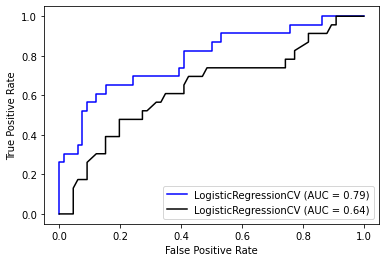

In [11]:
# lets plot ROC curve for them. the input is the model, the testing data and target for testing
fig1,ax1=plt.subplots(1,1)
plot_roc_curve(clf1,X_test1,y_test1,color='blue',ax=ax1)
plot_roc_curve(clf2,X_test2,y_test2,color='black',ax=ax1)

In [12]:
## lets do a third model where we use all the features from the training data of Diabetes
X_train3, X_test3, y_train3, y_test3 = train_test_split(diabetes_x, diabetes_y, test_size=0.20, random_state=42)
# training of final model using LogisiticRegression with 5 fold crossvalidation  and lbfgs solver (default)
clf3 =  LogisticRegressionCV(random_state=0, solver='lbfgs',cv=5)
# fit the training data to the model # we are using np.ravel because LogisticRegression expects the input to be data in 1D
clf3.fit(X_train3,np.ravel(y_train3.values)) 


LogisticRegressionCV(cv=5, random_state=0)

In [13]:
# test the model1 and derive the accuracy score  (79% in this case)
print(f'Accuracy Score for Model 1 is {clf1.score(X_test1,y_test1):f}')
# test the model2 and derive the accuracy score  (78% in this case)
print(f'Accuracy Score for Model 2 is {clf2.score(X_test2,y_test2):f}')
# test the model2 and derive the accuracy score  (78% in this case)
print(f'Accuracy Score for Model 3 is {clf3.score(X_test3,y_test3):f}')

Accuracy Score for Model 1 is 0.797753
Accuracy Score for Model 2 is 0.741573
Accuracy Score for Model 3 is 0.842697


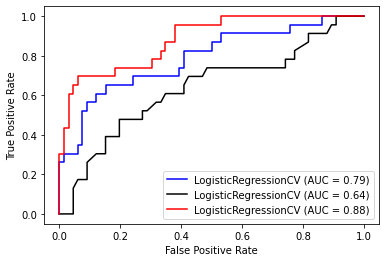

In [15]:
# lets plot ROC curve for them. the input is the model, the testing data and target for testing
fig1,ax1=plt.subplots(1,1)
plot_roc_curve(clf1,X_test1,y_test1,color='blue',ax=ax1)
plot_roc_curve(clf2,X_test2,y_test2,color='black',ax=ax1)
plot_roc_curve(clf3,X_test3,y_test3,color='red',ax=ax1)

## Lets try it on the iris data

In [30]:
# load IRIS data
# https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset
iris = datasets.load_iris()

In [31]:
# for display purpose show first five samples
iris.data[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
# load target
iris_target=iris['target']
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
iris_data=iris.data[:,:2]
iris_data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [19]:
# define the logistic regression with multinomial class (IRIS data has 3 classes)
clf_iris =  LogisticRegressionCV(random_state=0, solver='lbfgs',
                        multi_class='multinomial')
# fit
clf_iris = clf_iris.fit(iris_data,iris_target)

In [20]:
## Here we are determining the limits of data in feature 1 
x_min = iris_data[:, 0].min() - .5
x_max = iris_data[:, 0].max() + .5
## Here we are determining the limits of data in feature 2
y_min = iris_data[:, 1].min() - .5
y_max = iris_data[:, 1].max() + .5

## this is the step size for the mesh
h = .02 

In [22]:
## this will give us a step of values that we can use to test our model 
## essentially creates a grid of values
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
## this creates a combination test data
test_data=np.c_[xx.ravel(),yy.ravel()]

In [23]:
test_data

array([[3.8 , 1.5 ],
       [3.82, 1.5 ],
       [3.84, 1.5 ],
       ...,
       [8.36, 4.9 ],
       [8.38, 4.9 ],
       [8.4 , 4.9 ]])

In [1]:
## first lest predict using the test data and the logistic regression model
Z = clf_iris.predict(test_data)
## changing the shape of Z to make it easier to plot
Z = Z.reshape(xx.shape)
#
Z

NameError: name 'clf_iris' is not defined

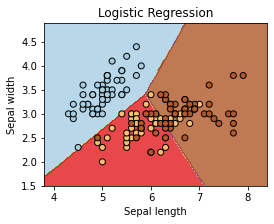

In [33]:
## Now we will create a figure to plot this data
plt.figure(1, figsize=(4, 3))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
# in this figure we create a contour of what the prediction will be and coloar coded it 
# for all possible value of feature 1 and feature 2

## now we will create the scatter plot of our data in to the same model
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=iris_target, edgecolors='k',  cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Logistic Regression')
plt.show()

In [ ]:
## TRY to implement training and testing sample on the IRIS data and perform prediction
## This wont be graded or count towards your final grade but it can be a good practice.
## I will provide the answer in next Saturday's Zoom Session along with some other examples